In [1]:
#import dependencies

import pandas as pd
from datetime import datetime

In [2]:
#Store file path in a variable and read in csv

file = "MasterYouTube.csv"

master_df = pd.read_csv(file)

#Print head
master_df.head()

,Unnamed: 0,Video Title,Video ID,Number of Days Trending,Time Published,Total Views
0,0,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422
1,1,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270
2,2,"The ULTIMATE $30,000 Gaming PC Setup",r-3iathMo7o,28,2018-05-13T19:00:25.000Z,6541522
3,3,Cobra Kai Season 2,WIV3xNz8NoM,28,2018-05-10T17:02:55.000Z,1011030
4,4,YoungBoy Never Broke Again Goes Sneaker Shoppi...,t4pRQ0jn23Q,28,2018-05-14T14:00:03.000Z,4406761


In [3]:
#Pull out the columns I want

time_df = master_df[["Video Title", "Video ID", "Time Published", "Number of Days Trending", "Total Views"]]

time_df.head()

,Video Title,Video ID,Time Published,Number of Days Trending,Total Views
0,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,2018-05-09T17:00:00.000Z,29,17424422
1,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,2018-05-13T18:03:56.000Z,29,9081270
2,"The ULTIMATE $30,000 Gaming PC Setup",r-3iathMo7o,2018-05-13T19:00:25.000Z,28,6541522
3,Cobra Kai Season 2,WIV3xNz8NoM,2018-05-10T17:02:55.000Z,28,1011030
4,YoungBoy Never Broke Again Goes Sneaker Shoppi...,t4pRQ0jn23Q,2018-05-14T14:00:03.000Z,28,4406761


In [4]:
#Reformat time so I can pull out just the hour published and put it in a new column
#Pull out just the time of day (Hour) and create a new column

time_df["Hour Published"] = pd.to_datetime(time_df["Time Published"]).dt.hour

time_df

,Video Title,Video ID,Time Published,Number of Days Trending,Total Views,Hour Published
0,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,2018-05-09T17:00:00.000Z,29,17424422,17
1,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,2018-05-13T18:03:56.000Z,29,9081270,18
2,"The ULTIMATE $30,000 Gaming PC Setup",r-3iathMo7o,2018-05-13T19:00:25.000Z,28,6541522,19
3,Cobra Kai Season 2,WIV3xNz8NoM,2018-05-10T17:02:55.000Z,28,1011030,17
4,YoungBoy Never Broke Again Goes Sneaker Shoppi...,t4pRQ0jn23Q,2018-05-14T14:00:03.000Z,28,4406761,14
...,...,...,...,...,...,...
6346,Skipping in High School,nCPIKP_84qs,2018-01-21T19:56:46.000Z,1,1931851,19
6347,4 Life Hacks that Will Ruin Your Life,JR4oPuV3CWg,2017-12-03T17:00:01.000Z,1,239226,17
6348,Skelly the Skeleton Robot wishing you a Merry ...,JdrdNQfZoqs,2017-11-23T16:11:09.000Z,1,4767,16
6349,Kim Kardashian Lets Gender of Third Child Slip,8hKbIhrb1WU,2017-11-15T14:00:02.000Z,1,1559003,14


In [13]:
#Organize by hour published

time_df = time_df.sort_values(["Hour Published", "Total Views"], ascending=False)

time_df.head()

,Video Title,Video ID,Time Published,Number of Days Trending,Total Views,Hour Published
98,"Calvin Harris, Dua Lipa - One Kiss (Official V...",DkeiKbqa02g,2018-05-02T23:01:00.000Z,21,71017021,23
2195,Turkish Airlines - 5 Senses with Dr. Oz,yvicqMrAHvQ,2018-02-04T23:55:21.000Z,7,23932421,23
1079,Jurassic World: Fallen Kingdom - Official Trai...,NooW_RbfdWI,2018-02-04T23:28:16.000Z,10,21113889,23
1720,Hope Detector | Hyundai NFL Super Bowl LII,wJJqGh2HLM8,2018-02-04T23:31:40.000Z,8,15904385,23
20,Calum Scott - What I Miss Most (Official Video),H7gh2fmdjCU,2018-05-16T23:00:00.000Z,27,6379536,23


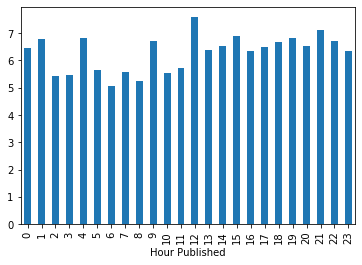

In [16]:
#Find average days trending vs. hour published and put into a bar graph

time_df.groupby('Hour Published')['Number of Days Trending'].mean().plot(kind='bar')


In [ ]:
#Do the same but with Sum

What can I infer from this?

In [22]:
#Find total views of all videos by hour published and put into a df
totalviews = time_df.groupby('Hour Published')['Total Views'].sum()

totalviews

Hour Published
0     325599960
1     344197971
2     303390186
3     279542203
4     729761534
5     531861552
6     145420964
7     281727760
8     335686853
9     392438288
10    204670082
11    317463789
12    397414780
13    648723620
14    721822350
15    875594490
16    844040907
17    764382881
18    595676486
19    377956952
20    509891335
21    501725294
22    441520229
23    325556902
Name: Total Views, dtype: int64

In [ ]:
#Create a line graph to show this

In [23]:
#Find total average views of all videos by hour published
totalviews = time_df.groupby('Hour Published')['Total Views'].mean()

totalviews

Hour Published
0     1.466666e+06
1     1.774216e+06
2     1.763896e+06
3     1.615851e+06
4     3.944657e+06
5     2.406613e+06
6     1.384962e+06
7     2.253822e+06
8     2.223092e+06
9     4.360425e+06
10    2.088470e+06
11    2.130629e+06
12    1.948112e+06
13    1.977816e+06
14    1.682570e+06
15    1.737291e+06
16    1.462809e+06
17    1.442232e+06
18    1.375696e+06
19    1.215296e+06
20    1.559301e+06
21    1.695018e+06
22    1.512056e+06
23    1.385349e+06
Name: Total Views, dtype: float64

In [11]:
#Create line graph that shows time (x) by average views(y) 

What can I infer from this?